## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly   
0              1                1                          18  \
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount   
0                                  4        2           1049  \
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent   
0                     1                             2                    4  \
1                     1                             3               

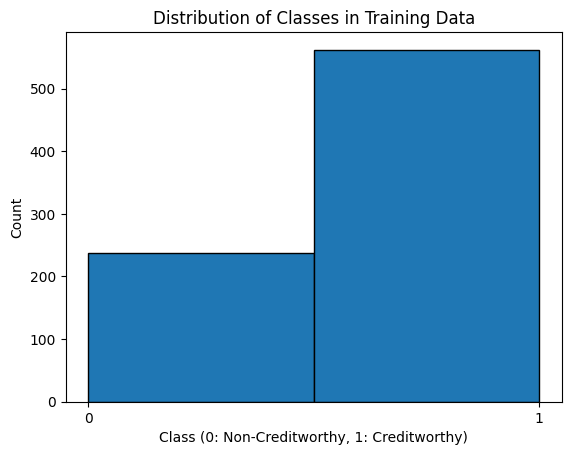

In [4]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [5]:
# Обучение Random Forest
rf_model = RandomForestClassifier(criterion='entropy',max_depth=35,max_features='sqrt',min_samples_leaf=3,min_samples_split=2,n_estimators = 838)
rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=1, random_state=42)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.65
Accuracy: 0.74
Precision: 0.77
Recall: 0.90

Gradient Boosting метрики:
ROC AUC: 0.50
Accuracy: 0.69
Precision: 0.69
Recall: 1.00


In [10]:
# Обучение MLP (Multi-Layer Perceptron) нейронной сети
mlp_model = MLPClassifier(hidden_layer_sizes=(50,),alpha=0.001, max_iter=80, random_state=1)
mlp_model.fit(X_train, y_train)

# Прогноз на тестовых данных
mlp_pred = mlp_model.predict(X_test)

# Расчет метрик для MLP нейронной сети
mlp_roc_auc = roc_auc_score(y_test, mlp_pred)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.50
Accuracy: 0.69
Precision: 0.69
Recall: 1.00


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import randint

rf_model = RandomForestClassifier(random_state=10)

param_dist = {
    'n_estimators': randint(100, 1000),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

# Создание объекта RandomizedSearchCV
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='roc_auc', random_state=10)

# Обучение модели с подбором параметров
random_search.fit(X_train, y_train)

# Вывод наилучших параметров
print(random_search.best_params_)

KeyboardInterrupt: 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from scipy.stats import randint, uniform

gb_model = GradientBoostingClassifier(random_state=42)

# Определение распределений для параметров
param_dist = {
    'n_estimators': randint(100, 500),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': randint(3, 8),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.6, 0.4)
}

random_search = RandomizedSearchCV(gb_model, param_distributions=param_dist, n_iter=50, cv=5, scoring='roc_auc', random_state=42)

# Обучение модели с подбором параметров
random_search.fit(X_train, y_train)

# Вывод наилучших параметров
print(random_search.best_params_)